# T-Test

In [4]:
import numpy as np
import random
import lascar
lascar.logger.setLevel(lascar.logging.CRITICAL)

import datasets

In [16]:
def partitions(guess):
    def partition(value):
        return lascar.tools.aes.sbox[value["input"][0] ^ guess] & 0x01
    return partition

engines = [
    lascar.TTestEngine(
        name=f"key {guess}",
        partition_function=partitions(guess),
    )
    for guess in range(170, 175)
]

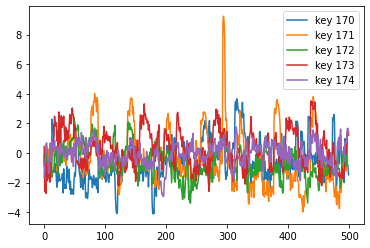

In [18]:
data = datasets.dataset("cw_loop5_fixedkey")

trace = lascar.TraceBatchContainer(data['trace'], data)
session = lascar.Session(
    trace,
    engines=engines,
    output_method=lascar.MatPlotLibOutputMethod(*engines, single_plot=True, legend=True),
    progressbar=False,
)
session.run(batch_size=10_000, thread_on_update=False)